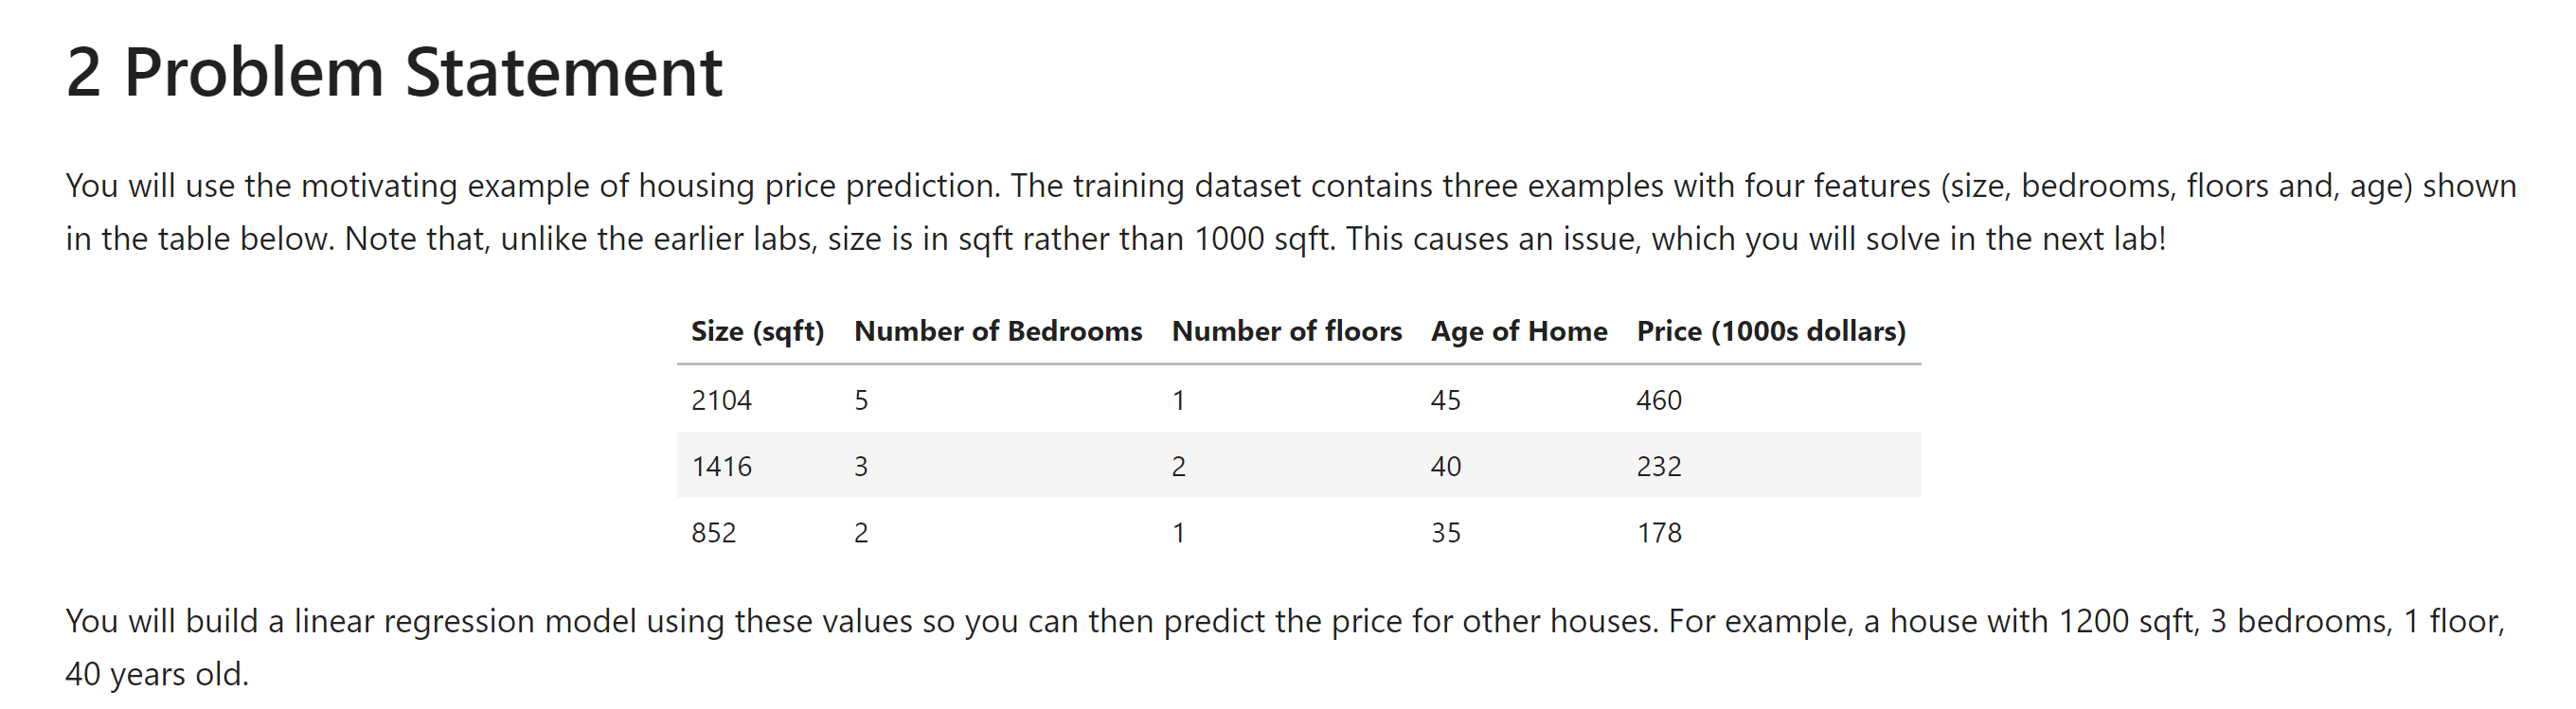

In [9]:
#Importing the necessary libraries:-
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [14]:
#Creating the dataset:-
x_train = np.array( [ 
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [852, 2, 1 ,35]
      ] )

y_train = np.array( [ 460, 232, 178] )

In [33]:
#Weights and Bias terms for the dataset:-
'''
w => 1 x n, in this dataset, n = number of columns/features = 4.
m = num of training examples = 3
b => scalar
'''
w = np.array( [0.39133535, 18.75376741, -53.36032453, -26.42131618 ] )
b = 785.1811367994083
print( w.shape)

(4,)


 Single Prediction element by element

In [20]:
def predict_single_loop( X, w, b):
    p = 0
    m = X.shape[0]
    for i in range(m):
        p_i = w[i] * X[i]
        p += p_i
    p += b
    return p

In [21]:
#Test one training example:
print(predict_single_loop( x_train[0,:], w, b ) )

459.9999976194083


In [22]:
#The above code can also use np.dot( w,X ) instead of for loop.

Compute Cost With Multiple Variables


In [23]:
def compute_cost( X, y, w, b):
    #Eqn: f_wb = np.dot(w_vec, X_vec) +b
    #J_wb = 1/2m * np.sum( f_wb - y_vec )**2
    #return J_wb

    m,n = X.shape
    J_wb = 0 #COST

    for i in range(m):
        f_wb_i = np.dot( X[i], w ) + b
        J_wb += (f_wb_i - y[i] )**2
    J_wb = J_wb/(2*m)

    return J_wb

In [24]:
print("COST FOR TRAINING DATA IS:- ", compute_cost(x_train, y_train, w, b) )

COST FOR TRAINING DATA IS:-  1.5578904428966628e-12


Compute Gradient with Multiple Variables

In [25]:
def compute_gradient( X, y, w, b):
    #dj_dw = 1/m*[np.sum( fw_b - y) * x ]
    #dj_db = 1/m *[ np.sum( f_wb - y) ]
    #return dj_dw, dj_db
    
    m, n = X.shape
    dj_db = 0.0
    dj_dw = np.zeros( (n,) )

    for i in range(0,m):
        error_i = ( np.dot(X[i], w) + b ) - y[i]
        
        for j in range(0,n): #this is because:- dj/dw1, dj/dw2, ..... , dj/dw_n
            dj_dw[j] = dj_dw[j] + ( error_i * X[i,j] )
        dj_db = dj_db + error_i
        
        dj_dw = dj_dw/m
        dj_db = dj_db/m

        return dj_dw, dj_db

In [26]:
temp_dj_dw, temp_dj_db = compute_gradient( x_train, y_train, w, b)
print("dj/dw => ", temp_dj_dw)
print("dj/db => ", temp_dj_db)

dj/dw =>  [-1.66958831e-03 -3.96765283e-06 -7.93530565e-07 -3.57088754e-05]
dj/db =>  -7.93530565109298e-07


In [38]:
def gradient_descent_mul_lin_reg( X, y, w_in, b_in, compute_cost_func, compute_gradient_func, alpha_lr, num_of_iters):
    # m traing examples with n features.
    m, n = X.shape

    J_hist = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range( 0, num_of_iters):
        dj_dw, dj_db = compute_gradient_func( X, y, w, b )

        #update W & b simultaneously:-
        w = w - ( alpha_lr * dj_dw )
        b = b - ( alpha_lr * dj_db )

        if i < 100000:
            J_hist.append( compute_cost_func( X, y, w, b ) )
        
        if i % math.ceil(num_of_iters/10) == 0:
            print("COST at", i, "is =>", J_hist[-1] )
    return w, b, J_hist

In [40]:
w_in = np.zeros( (x_train.shape[1], ) )
b_in = 0.0
alpha = 0.01
num_iters = 50
w_final, b_final, J = gradient_descent_mul_lin_reg( x_train, y_train, w_in, b_in, compute_cost, compute_gradient, alpha, num_iters )
print( "W_final =>", w_final )
print( "b_Final =>", b_final )

COST at 0 is => 12428318746482.336
COST at 5 is => 6.1070097198097245e+54
COST at 10 is => 3.000884220824058e+96
COST at 15 is => 1.4745851930740625e+138
COST at 20 is => 7.245869322596425e+179
COST at 25 is => 3.560501114940126e+221
COST at 30 is => 1.749571738749937e+263
COST at 35 is => 8.597108019959022e+304
COST at 40 is => inf
COST at 45 is => inf
W_final => [-6.26057142e+207 -1.48777838e+205 -2.97555676e+204 -1.33900054e+206]
b_Final => -2.9755567579186004e+204


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [41]:
#PREDICTION:-
m = x_train.shape[0]
for i in range(m):
    print("Prediction: ",( np.dot(x_train[i], w_final) + b_final),"Target Value: ", y_train[i] )

Prediction:  -1.3178348107329438e+211 Target Value:  460
Prediction:  -8.870378691009496e+210 Target Value:  232
Prediction:  -5.338729057273763e+210 Target Value:  178


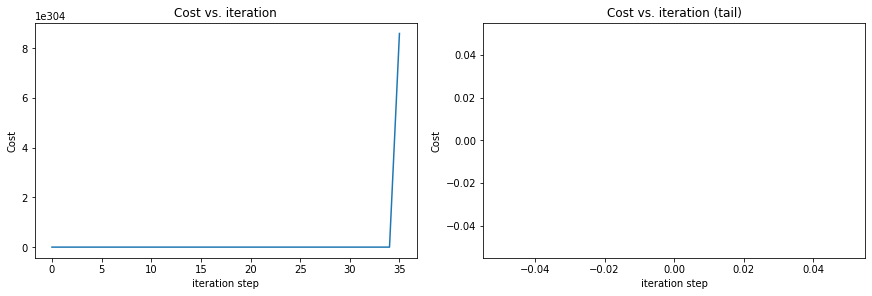

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J)
ax2.plot(100 + np.arange(len(J[100:])), J[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()